In [260]:
import pandas as pd
import numpy as np

In [261]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [263]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [264]:
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

In [265]:
print('duplicates = ',df.duplicated().sum())
print(df.isnull().sum())

duplicates =  0
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [266]:
df_processed = df.drop(columns=['Person ID'])
df_processed['Sleep Disorder'].fillna('No Sleep Disorder', inplace=True) #no diagnosis means no sleep disorder. add that to fill all NAN values
df_processed.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_28596\2830868143.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['Sleep Disorder'].fillna('No Sleep Disorder', inplace=True) #no diagnosis means no sleep disorder. add that to fill all NAN values


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep Disorder
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [267]:
cat_cols = df_processed.select_dtypes(include=['object']).columns
num_cols = df_processed.select_dtypes(include=['number']).columns

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)
print(df[cat_cols].nunique())

Categorical columns: Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
       'Sleep Disorder'],
      dtype='object')
Numerical columns: Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')
Gender             2
Occupation        11
BMI Category       4
Blood Pressure    25
Sleep Disorder     2
dtype: int64


In [268]:
df_processed['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [269]:
df_processed.replace({'Normal Weight':'Normal'}, inplace=True) #normal and normal weight is the same. set all to normal
df_processed['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [270]:
BMIs = ['Normal','Overweight','Obese']
print(BMIs)

['Normal', 'Overweight', 'Obese']


In [271]:
#encoding ordinal categorical values

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[BMIs])
ordinal_encoder2 = OrdinalEncoder()
enc = ordinal_encoder.fit_transform(df_processed[['BMI Category']])
df_processed['BMI Category'] = enc


df_processed[['systolic_bp', 'diastolic_bp']] = df_processed['Blood Pressure'].str.split('/', expand=True)
df_processed = df_processed.drop(columns=['Blood Pressure'])
df_processed.head()

In [273]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    float64
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    object 
 11  systolic_bp              374 non-null    object 
 12  diastolic_bp             374 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 38.1+ KB


In [274]:
df_processed.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,1.0,77,4200,No Sleep Disorder,126,83
1,Male,28,Doctor,6.2,6,60,8,0.0,75,10000,No Sleep Disorder,125,80
2,Male,28,Doctor,6.2,6,60,8,0.0,75,10000,No Sleep Disorder,125,80
3,Male,28,Sales Representative,5.9,4,30,8,2.0,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,2.0,85,3000,Sleep Apnea,140,90


In [275]:
df_processed.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,0.449198,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,0.549274,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,0.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,0.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,0.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,1.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,2.000000,86.000000,10000.000000


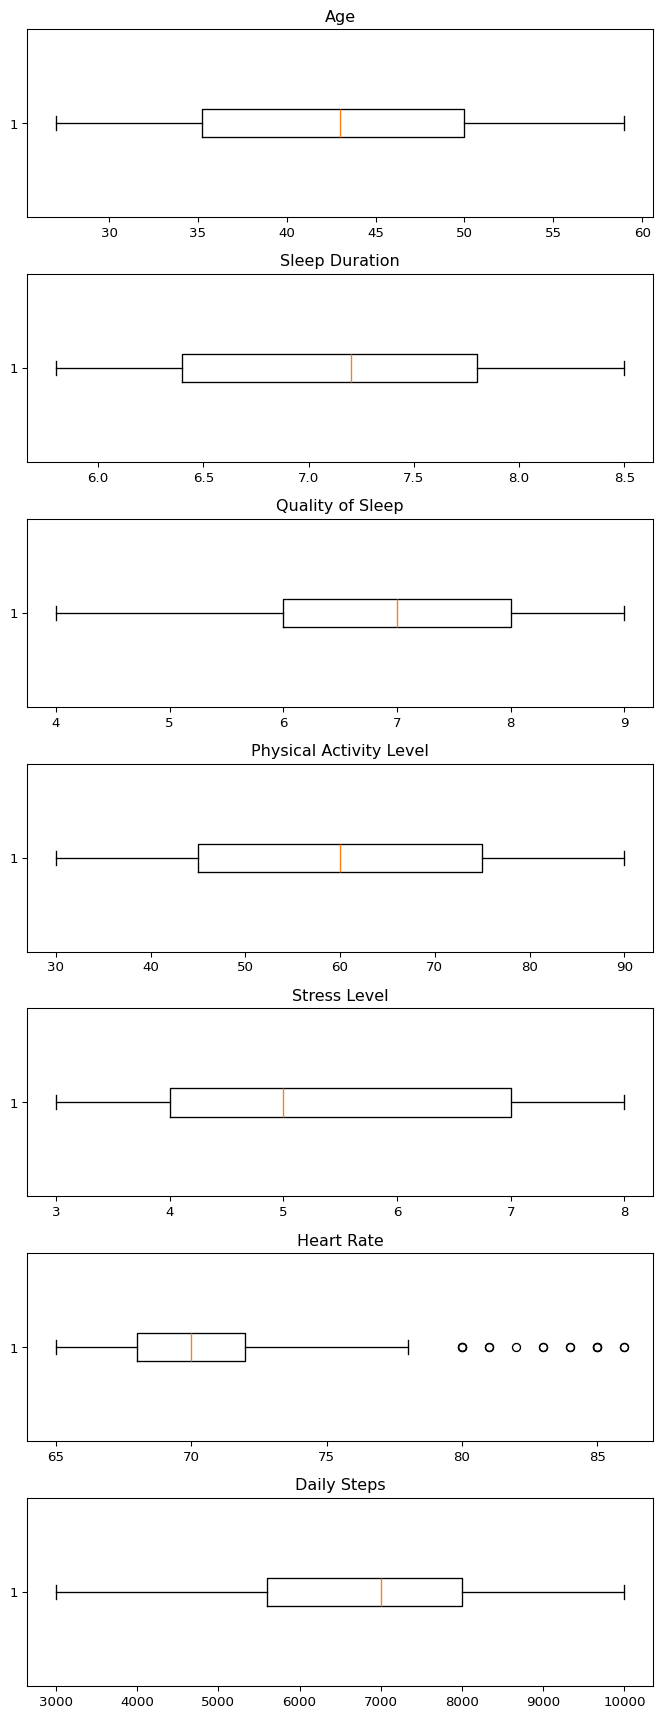

In [276]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(len(df_processed[num_cols].columns), 1, figsize=(7, 18), dpi=96)
for i, col in enumerate(df_processed[num_cols].columns):
    ax[i].boxplot(df_processed[num_cols][col], vert=False)
    ax[i].set_title(col)
plt.tight_layout()
plt.show()

Heartrate is an important category, so its not considered as an outlier.

In [277]:
corr = df_processed.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8), dpi=96)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Male'

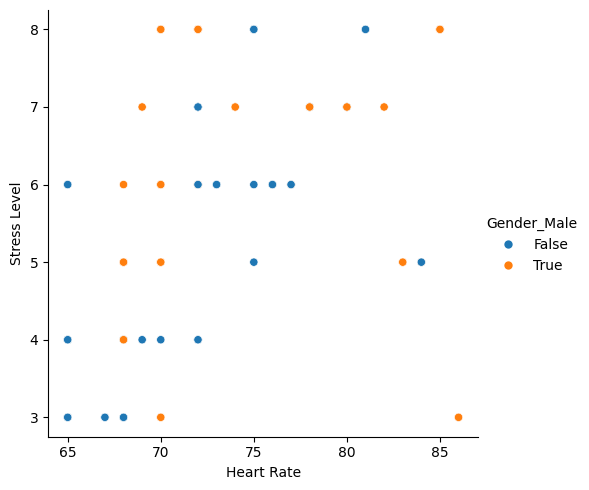

In [ ]:
sns.relplot(x= 'Heart Rate', y='Stress Level', hue='Gender_Male', data=df_processed)

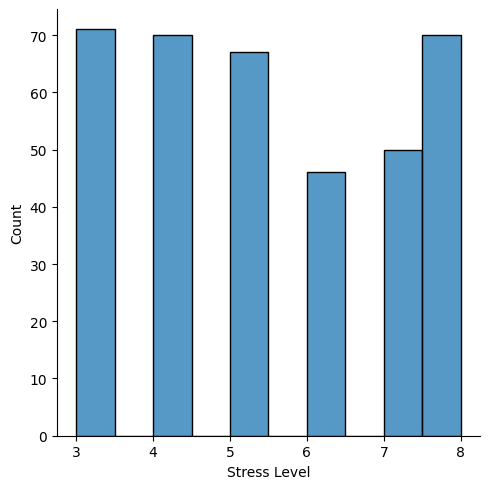

In [ ]:
sns.displot(df_processed['Stress Level'])